## Thermal Benchmark Processing ##
The purpose of this notebook is to process and plot the thermal benchmark data.

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#import data
file_path = 'Infotainment\InfotainmentThermalBenchmark_4kBETA_10312023_20Brightness.csv' #insert path to data
file_name = 'InfotainmentThermalBenchmark_4kBETA_10312023_20Brightness.csv' #insert path to data
df = pd.read_csv(file_path)
df.columns.values[0] = 'Time Stamp (UTC)'
df.head()

,Time Stamp (UTC),Channel 1 - Internal Ambient Last (C),Channel 2 - External Ambient Last (C),Channel 3 - Jetson Processor Last (C),Channel 4 - Jetson Heatsink Last (C),Channel 5 - Display Cable Last (C),Channel 6 - Touch Panel Board Last (C),Channel 7 - Aluminum Panel - Upper Right Side Last (C),Channel 8 - Display Panel - Upper Right Side Last (C),Channel 9 - Coverglass - Upper Right Side Last (C),Channel 10 - Aluminum Panel - Lower Left Side Last (C),Channel 11 - Display Panel - Lower Left Side Last (C),Channel 12 - Coverglass - Lower Left Side Last (C),Channel 13 - Ambient Between Aluminum and Display Last (C)
0,00:00:00,30.20,22.52,36.39,36.91,28.97,30.28,31.10,28.08,26.36,30.86,27.92,26.46,30.01
1,00:00:01,30.19,22.34,36.38,36.90,28.95,30.27,31.10,28.07,26.37,30.86,27.92,26.45,30.00
2,00:00:02,30.20,22.70,36.36,36.88,28.95,30.27,31.09,28.07,26.36,30.86,27.91,26.45,30.00
3,00:00:03,30.19,22.52,36.35,36.86,28.95,30.25,31.09,28.08,26.38,30.86,27.92,26.46,30.00
4,00:00:04,30.18,22.74,36.32,36.84,28.93,30.24,31.07,28.06,26.38,30.85,27.90,26.45,29.99


In [3]:
# df = df[1500:]
# df.index[df['Channel 2 - Forearm Last (C)']>55]/60

Channel 1 - Internal Ambient Last (C)
Channel 2 - External Ambient Last (C)
Channel 3 - Jetson Processor Last (C)
Channel 4 - Jetson Heatsink Last (C)
Channel 5 - Display Cable Last (C)
Channel 6 - Touch Panel Board Last (C)
Channel 7 - Aluminum Panel - Upper Right Side Last (C)
Channel 8 - Display Panel - Upper Right Side Last (C)
Channel 9 - Coverglass - Upper Right Side Last (C)
Channel 10 - Aluminum Panel - Lower Left Side Last (C)
Channel 11 - Display Panel - Lower Left Side Last (C)
Channel 12 - Coverglass - Lower Left Side Last (C)
Channel 13 - Ambient Between Aluminum and Display Last (C)


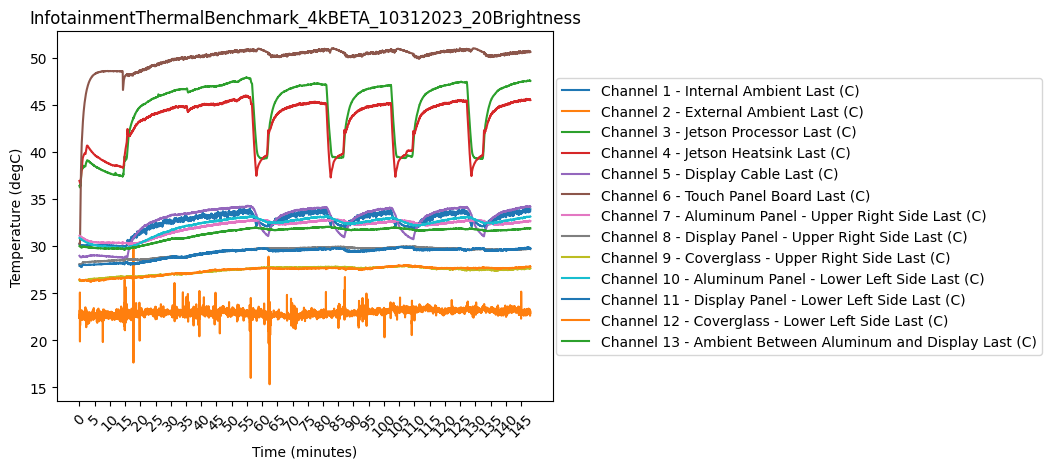

In [4]:
title = file_name.split('.')[0]

# for col in df.columns:
#     plt.plot(df['Time Stamp (h:mm:ss)'], df[col], label = col)

for col in df.columns[1:]:
    plt.plot(df[col], label = col)
    print(col)

plt.title(title)
#set ticks to every 10 minutes
x = range(0,len(df['Time Stamp (UTC)']),300)
x_labels = []
for i in range(0,len(x)):
    x_labels.append(round(x[i]/60))

y = [60] * len(x)
plt.xticks(x, x_labels, rotation=45)
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degC)')
# plt.plot(x, y, marker = '.', color = 'r', label = 'Touch Surface Limit')
plt.legend(loc = 'center right', bbox_to_anchor = (2,0.5))
plt.show()

## System Only ##

In [5]:
df_stats = df.describe()
for i in df_stats:
    name = i.split('(C)')[0]
    max = round(df_stats[i]['max'],1)
    min = round(df_stats[i]['min'],1)
    peak_valley = round(max-min, 1)
    print('{}   {}  {}  {}'.format(name, max, min, peak_valley))

df_stats

Channel 1 - Internal Ambient Last    34.0  30.0  4.0
Channel 2 - External Ambient Last    29.9  15.3  14.6
Channel 3 - Jetson Processor Last    47.9  36.2  11.7
Channel 4 - Jetson Heatsink Last    46.0  36.7  9.3
Channel 5 - Display Cable Last    34.3  28.7  5.6
Channel 6 - Touch Panel Board Last    51.0  30.2  20.8
Channel 7 - Aluminum Panel - Upper Right Side Last    32.8  30.2  2.6
Channel 8 - Display Panel - Upper Right Side Last    30.0  28.0  2.0
Channel 9 - Coverglass - Upper Right Side Last    27.9  26.3  1.6
Channel 10 - Aluminum Panel - Lower Left Side Last    33.2  29.8  3.4
Channel 11 - Display Panel - Lower Left Side Last    29.9  27.8  2.1
Channel 12 - Coverglass - Lower Left Side Last    28.0  26.2  1.8
Channel 13 - Ambient Between Aluminum and Display Last    32.1  29.6  2.5


,Channel 1 - Internal Ambient Last (C),Channel 2 - External Ambient Last (C),Channel 3 - Jetson Processor Last (C),Channel 4 - Jetson Heatsink Last (C),Channel 5 - Display Cable Last (C),Channel 6 - Touch Panel Board Last (C),Channel 7 - Aluminum Panel - Upper Right Side Last (C),Channel 8 - Display Panel - Upper Right Side Last (C),Channel 9 - Coverglass - Upper Right Side Last (C),Channel 10 - Aluminum Panel - Lower Left Side Last (C),Channel 11 - Display Panel - Lower Left Side Last (C),Channel 12 - Coverglass - Lower Left Side Last (C),Channel 13 - Ambient Between Aluminum and Display Last (C)
count,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00,8886.00
mean,32.61,22.96,44.53,43.22,32.70,49.98,32.06,29.42,27.41,32.21,29.29,27.41,31.35
std,1.08,0.39,3.36,2.48,1.61,1.50,0.80,0.52,0.41,0.99,0.58,0.44,0.74
min,29.95,15.34,36.22,36.69,28.73,30.21,30.21,28.00,26.29,29.76,27.77,26.23,29.61
25%,32.23,22.76,41.96,41.30,31.98,50.03,31.88,28.96,27.11,32.20,29.00,27.14,31.01
50%,32.91,22.97,46.37,44.52,33.38,50.39,32.39,29.67,27.56,32.58,29.56,27.61,31.73
75%,33.41,23.18,47.00,45.06,33.90,50.66,32.60,29.79,27.73,32.87,29.66,27.68,31.83
max,34.04,29.89,47.88,45.98,34.28,50.98,32.82,29.97,27.91,33.18,29.91,27.98,32.05


## Touchpoint Only ##

In [59]:
df_stats = df[1500:8000].describe()



In [61]:
df_stats_formatted = pd.DataFrame(columns = ['Channel - Location', 'Max Temperature (degC)', 'Min Temperature (degC)', 'Peak-Valley (degC)'])
for i in df_stats:
    name = i.split('(C)')[0]
    max = round(df_stats[i]['max'],1)
    min = round(df_stats[i]['min'],1)
    peak_valley = round(max-min,1)
    df_stats_formatted = pd.concat([df_stats_formatted, pd.DataFrame(data = {'Channel - Location': [name],
                                                                             'Max Temperature (degC)': [max],
                                                                             'Min Temperature (degC)': [min],
                                                                             'Peak-Valley (degC)': [peak_valley]})])
    # print('{}   {}  {}  {}'.format(name, max, min, peak_valley))

df_stats_formatted['Peak-Valley (degC)']


0   6499.00
0      6.00
0      6.10
0      4.20
0      5.40
0      5.10
0      4.70
0      6.30
0      4.10
0     30.70
0      5.30
0      8.50
0      5.30
0      0.60
Name: Peak-Valley (degC), dtype: float64

In [11]:
df_surface = df.iloc[:, 1:9]
max_diff = []
for i in range(len(df_surface)):
    max_diff.append(df_surface.iloc[i,:].max()-df_surface.iloc[i,:].min())

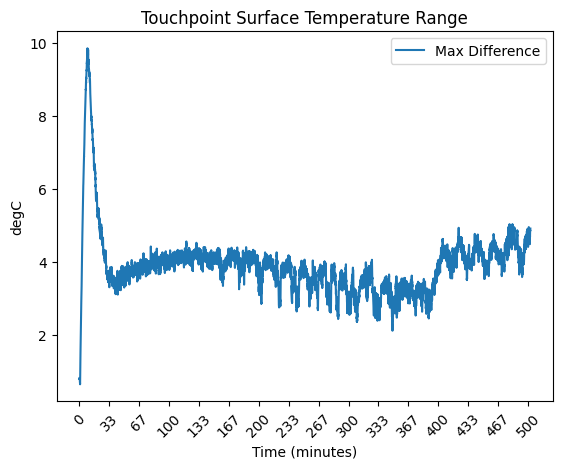

In [12]:
plt.plot(max_diff, label = 'Max Difference')
plt.title('Touchpoint Surface Temperature Range')
x = range(0,len(df['Time Stamp (UTC)']),2000)
x_labels = []
for i in range(0,len(x)):
    x_labels.append(round(x[i]/60))
plt.xticks(x, x_labels, rotation=45)
plt.xlabel('Time (minutes)')
plt.ylabel('degC')
plt.legend()